In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

class Preprocessing:
    def __init__(self, raw_data, nanvalues, dropc=None, dropr=None, rename=None):
        self.data = pd.read_csv(raw_data, na_values=nanvalues)
        self.data = pd.DataFrame(self.data)
        self.data = self.data.dropna(axis=0, how='any', thresh=None, subset=None)
        if dropc:
            self.data = self.data.drop(labels=dropc, axis=1)
        if dropr:
            self.data = self.data.drop(labels=dropr, axis=0)
        if rename:
            self.data = self.data.rename(columns=rename)
    # takes in unaltered dataset; turns it into dataframe; specifies characters to be converted into NaN
    # drops rows with any NaN values
    # drops rows and columns specified; renames specified columns
    
            
    def LabelEncode(self,data,cols):
        le = preprocessing.LabelEncoder()
        data[cols] = le.fit_transform(data[cols])
        return data
    # label encodes specified column of dataset
    
            
    def encode(self,data,cols):
        data = pd.get_dummies(data, columns=cols)
        return data
    #one-hot encodes specified columns of dataset
    
    
    
    def normalize(self,data,cols):
        tempdf = data
        self.scaler = MinMaxScaler()
        data = self.scaler.fit_transform(data)
        data = pd.DataFrame(data, columns = tempdf.columns)
        return data
    # normalizes specified columns of dataset
            
    

In [184]:
autism_df = Preprocessing('Autism_Data.arff', nanvalues='?', dropc=['A1_Score', 'A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','result','age_desc'], dropr=52, rename = {'jundice':'jaundice', 'austim':'family_pdd', 'contry_of_res':'country_of_res'})
LabelEncoded = autism_df.LabelEncode(autism_df.data,['Class/ASD'])
LabelEncoded

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


age gender          ethnicity jaundice family_pdd  \
0    26.0      f     White-European       no         no   
1    24.0      m             Latino       no        yes   
2    27.0      m             Latino      yes        yes   
3    35.0      f     White-European       no        yes   
5    36.0      m             Others      yes         no   
6    17.0      f              Black       no         no   
7    64.0      m     White-European       no         no   
8    29.0      m     White-European       no         no   
9    17.0      m              Asian      yes        yes   
10   33.0      m     White-European       no         no   
11   18.0      f  'Middle Eastern '       no         no   
15   18.0      m  'Middle Eastern '       no        yes   
16   31.0      m  'Middle Eastern '       no         no   
17   30.0      m     White-European       no         no   
18   35.0      f  'Middle Eastern '       no        yes   
21   27.0      f              Black       no         no   
22   27.0      m  'Middle Eastern '       no         no   
23   42.0      m  'Middle Eastern '      yes         no   
26   40.0      m           Pasifika      yes        yes   
27   40.0      m  'Middle Eastern '      yes        yes   
28   48.0      m              Black       no         no   
29   31.0      m  'Middle Eastern '       no         no   
30   18.0      m     White-European       no         no   
31   37.0      f     White-European       no        yes   
32   55.0      f             Others       no         no   
33   18.0      f     White-European      yes         no   
34   18.0      f     White-European       no         no   
35   55.0      m     White-European       no         no   
36   50.0      m  'Middle Eastern '       no         no   
37   34.0      f     White-European       no         no   
38   53.0      f     White-European       no         no   
39   35.0      f     White-European       no        yes   
40   20.0      f             Latino      yes         no   
41   28.0      f              Asian       no         no   
42   34.0      f  'Middle Eastern '       no        yes   
43   36.0      f     White-European      yes        yes   
44   27.0      f     White-European       no         no   
45   53.0      f     White-European       no         no   
46   24.0      f           Pasifika       no         no   
47   24.0      m           Pasifika       no         no   
48   55.0      m     White-European       no         no   
49   30.0      f              Asian       no         no   
50   21.0      f             Latino       no         no   
51   35.0      f              Black       no         no   
53   21.0      m             Latino       no        yes   
54   47.0      m     White-European       no         no   
55   30.0      f              Asian       no         no   
56   28.0      f     White-European       no         no   
57   43.0      f     White-European       no         no   
58   32.0      f      'South Asian'       no        yes   
59   44.0      f     White-European       no         no   
60   20.0      f             Others       no         no   
61   20.0      f             Others       no         no   
63   19.0      m     White-European       no         no   
64   29.0      f     White-European       no         no   
65   21.0      m  'Middle Eastern '       no         no   
66   27.0      m  'Middle Eastern '       no         no   
67   21.0      m           Hispanic       no         no   
68   35.0      m  'Middle Eastern '       no         no   
69   42.0      m              Black       no         no   
70   29.0      f      'South Asian'       no         no   
71   58.0      m              Asian       no         no   
72   21.0      m             Others       no         no   
73   21.0      m             Others       no         no   
74   37.0      f     White-European       no        yes   
75   21.0      m           Hispanic       no         no   
76   20.0      m  'Middle Eastern '       no         

In [185]:
encoded = autism_df.encode(LabelEncoded,['gender','ethnicity','jaundice','family_pdd','country_of_res','used_app_before','relation'])
encoded

age  Class/ASD  gender_f  gender_m  ethnicity_'Middle Eastern '  \
0    26.0          0         1         0                            0   
1    24.0          0         0         1                            0   
2    27.0          1         0         1                            0   
3    35.0          0         1         0                            0   
5    36.0          1         0         1                            0   
6    17.0          0         1         0                            0   
7    64.0          0         0         1                            0   
8    29.0          0         0         1                            0   
9    17.0          1         0         1                            0   
10   33.0          1         0         1                            0   
11   18.0          0         1         0                            1   
15   18.0          0         0         1                            1   
16   31.0          0         0         1                            1   
17   30.0          0         0         1                            0   
18   35.0          0         1         0                            1   
21   27.0          0         1         0                            0   
22   27.0          0         0         1                            1   
23   42.0          0         0         1                            1   
26   40.0          0         0         1                            0   
27   40.0          0         0         1                            1   
28   48.0          0         0         1                            0   
29   31.0          0         0         1                            1   
30   18.0          0         0         1                            0   
31   37.0          1         1         0                            0   
32   55.0          0         1         0                            0   
33   18.0          1         1         0                            0   
34   18.0          1         1         0                            0   
35   55.0          0         0         1                            0   
36   50.0          0         0         1                            1   
37   34.0          0         1         0                            0   
38   53.0          1         1         0                            0   
39   35.0          1         1         0                            0   
40   20.0          1         1         0                            0   
41   28.0          0         1         0                            0   
42   34.0          0         1         0                            1   
43   36.0          0         1         0                            0   
44   27.0          1         1         0                            0   
45   53.0          1         1         0                            0   
46   24.0          0         1         0                            0   
47   24.0          0         0         1                            0   
48   55.0          0         0         1                            0   
49   30.0          0         1         0                            0   
50   21.0          0         1         0                            0   
51   35.0          1         1         0                            0   
53   21.0          1         0         1                            0   
54   47.0          1         0         1                            0   
55   30.0          1         1         0                            0   
56   28.0          1         1         0                            0   
57   43.0          1         1         0                            0   
58   32.0          0         1         0                            0   
59   44.0          0         1         0                            0   
60   20.0          1         1         0                            0   
61   20.0          1         1         0                            0   
63   19.0          0         0         1                        

In [186]:
normalized = autism_df.normalize(encoded, ['age'])
normalized 

age  Class/ASD  gender_f  gender_m  ethnicity_'Middle Eastern '  \
0    0.191489        0.0       1.0       0.0                          0.0   
1    0.148936        0.0       0.0       1.0                          0.0   
2    0.212766        1.0       0.0       1.0                          0.0   
3    0.382979        0.0       1.0       0.0                          0.0   
4    0.404255        1.0       0.0       1.0                          0.0   
5    0.000000        0.0       1.0       0.0                          0.0   
6    1.000000        0.0       0.0       1.0                          0.0   
7    0.255319        0.0       0.0       1.0                          0.0   
8    0.000000        1.0       0.0       1.0                          0.0   
9    0.340426        1.0       0.0       1.0                          0.0   
10   0.021277        0.0       1.0       0.0                          1.0   
11   0.021277        0.0       0.0       1.0                          1.0   
12   0.297872        0.0       0.0       1.0                          1.0   
13   0.276596        0.0       0.0       1.0                          0.0   
14   0.382979        0.0       1.0       0.0                          1.0   
15   0.212766        0.0       1.0       0.0                          0.0   
16   0.212766        0.0       0.0       1.0                          1.0   
17   0.531915        0.0       0.0       1.0                          1.0   
18   0.489362        0.0       0.0       1.0                          0.0   
19   0.489362        0.0       0.0       1.0                          1.0   
20   0.659574        0.0       0.0       1.0                          0.0   
21   0.297872        0.0       0.0       1.0                          1.0   
22   0.021277        0.0       0.0       1.0                          0.0   
23   0.425532        1.0       1.0       0.0                          0.0   
24   0.808511        0.0       1.0       0.0                          0.0   
25   0.021277        1.0       1.0       0.0                          0.0   
26   0.021277        1.0       1.0       0.0                          0.0   
27   0.808511        0.0       0.0       1.0                          0.0   
28   0.702128        0.0       0.0       1.0                          1.0   
29   0.361702        0.0       1.0       0.0                          0.0   
30   0.765957        1.0       1.0       0.0                          0.0   
31   0.382979        1.0       1.0       0.0                          0.0   
32   0.063830        1.0       1.0       0.0                          0.0   
33   0.234043        0.0       1.0       0.0                          0.0   
34   0.361702        0.0       1.0       0.0                          1.0   
35   0.404255        0.0       1.0       0.0                          0.0   
36   0.212766        1.0       1.0       0.0                          0.0   
37   0.765957        1.0       1.0       0.0                          0.0   
38   0.148936        0.0       1.0       0.0                          0.0   
39   0.148936        0.0       0.0       1.0                          0.0   
40   0.808511        0.0       0.0       1.0                          0.0   
41   0.276596        0.0       1.0       0.0                          0.0   
42   0.085106        0.0       1.0       0.0                          0.0   
43   0.382979        1.0       1.0       0.0                          0.0   
44   0.085106        1.0       0.0       1.0                          0.0   
45   0.638298        1.0       0.0       1.0                          0.0   
46   0.276596        1.0       1.0       0.0                          0.0   
47   0.234043        1.0       1.0       0.0                          0.0   
48   0.553191        1.0       1.0       0.0                          0.0   
49   0.319149        0.0       1.0       0.0                          0.0   
50   0.574468        0.0       1.0       0.0                          0.0   
51   0

In [208]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class Decision_tree:
    def __init__(self, dataset, labelsplit=None):
        self.data = dataset
        if labelsplit:
            self.label = self.data[labelsplit]
            self.data = self.data.drop(columns=labelsplit)
    # takes in dataset; turns column specified in labelsplit into the label 
        
    def results(self):
        data_train, data_test, label_train, label_test = train_test_split(self.data, self.label, test_size = 0.2, random_state = 35)
        model = DecisionTreeClassifier()
        model.fit(data_train, label_train)
        label_pred = model.predict(data_test)
        cf_matrix = confusion_matrix(label_test, label_pred)
        return accuracy_score(label_test, label_pred), sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
        # fits decision tree model to training data; returns accuracy score and heatmapped confusion matrix
        

(0.680327868852459, <matplotlib.axes._subplots.AxesSubplot at 0x7fd0095b0b80>)

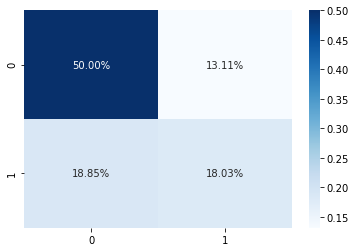

In [210]:
autism_tree = Decision_tree(normalized, labelsplit=['Class/ASD'])
autism_tree.results() # rows of confusion matrix are actual values; columns are predicted values